# Análise Exploratória de Dados 
## | Prevendo Evasão e o Sucesso Acadêmico de Aunos do Ensino Superior

### > **Objetivo do Notebook**: 

Este notebook é parte de um conjunto de quatro notebooks focados para estudar os dados, entender suas características, conduzir uma análise da variáveis e seus relacionamentos, modelar dois modelos de classificação baseados em técnicas distintas e por fim avaliar o modelo de melhor desempenho. O foco particular deste notebook é de analisar o conjunto de dados para entender suas principais características, identificar padrões, outliers e preparar insights iniciais para modelagem.

### > **Fonte do Dados**: 

O dataset presente nos arquivos do projeto foi extraído da competição do Kaggle <a href="https://www.kaggle.com/competitions/playground-series-s4e6/data">Classification with an Academic Success Dataset</a>  gerado a partir de um modelo de aprendizagem profunda treinado no conjunto de dados <a href="https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success">Predict Students' Dropout and Academic Success</a>. As distribuições de *features* são próximas, mas não exatamente iguais, aos do original.

### > **Problemática do Projeto**:

No Brasil no ano de 2024, dados do Mapa do Ensino Superior organizado pelo <a href="https://www.semesp.org.br/instituto/home/">Instituto Semesp</a>, apontam que cerca de **57% dos estudantes** [1] que ingressam em cursos superiores acabam abandonando seus estudos antes da conclusão. Essa taxa inclui tanto instituições públicas quanto privadas e abrange modalidades presenciais e a distância. 

Em números absolutos, a evasão é expressiva, com estimativas indicando que quase **3,5 milhões de alunos deixaram o ensino superior** [2] em 2021 apenas nas instituições privadas, tornando o abandono um dos grandes desafios do setor educacional brasileiro. O fenômeno se agrava em modalidades como o ensino a distância (EaD), que teve uma taxa de evasão de **36,6%**, próxima ao ensino presencial [1].

O projeto em questão propõe desenvolver um modelo preditivo que, com base em dados históricos e padrões identificados, possa prever quais alunos estão em risco de evasão. Esse sistema visa oferecer às instituições de ensino superior uma ferramenta para identificar estudantes com alta propensão ao abandono, possibilitando intervenções precoces e personalizadas que contribuam para a redução das taxas de evasão. Ao apoiar as universidades na aplicação de estratégias direcionadas de retenção, o modelo busca criar um impacto positivo e duradouro na educação superior brasileira.

Fonte: <a href="https://www.correiobraziliense.com.br/euestudante/ensino-superior/2024/05/6852929-ensino-superior-no-brasil-tem-57-de-evasao-na-rede-publica-e-privada.html">[1]</a>, <a href="https://g1.globo.com/educacao/noticia/2022/01/02/quase-35-milhoes-de-alunos-evadiram-de-universidades-privadas-no-brasil-em-2021.ghtml">[2]</a>

<a name="índice"></a>
# | Índice

1. [Preparação dos Dados](#preparacao)
   - 1.1 [Importando Bibliotecas](#bibliotecas)
   - 1.2 [Carregando Dados](#dados)
2. [Exploração e Tratamento dos Dados](#exploracao)
   - 2.1 [Dicionário](#dicionário)
   - 2.2 [Tratamento Inicial dos Dados](#tratamento)
   - 2.3 [Características dos Dados](#características)
   - 2.4 [Correlação](#corr)
3. [Análise Univariada](#univariada)
4. [Análise Bivariada](#bivariada)
5. [Padrões nos Dados](#padrao)
6. [Insights](#insights)
7. [Próximos Passos](#prox)

<a name="preparacao"></a>
# | Preparação dos Dados

Como primeira etapa do nosso trabalho, vamos começar importando as **bibliotecas** necessárias para a preparação dos dados para a análise e modelagem.

<a name="bibliotecas"></a>
## | Importando Bibliotecas

Nesse notebook, vamos utilizar **pandas** para manipulação dos dados e **seaborn** com **matplotlib** para visualização de gráficos. Também usaremos o **ydata_profiling** para gerar relatórios da base de dados.

In [51]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

%matplotlib inline

<a name="dados"></a>
## | Carregando Dados

Agora vamos extrair os dados do diretório do projeto e visualizar sua estrutura.

In [42]:
df = pd.read_csv('../data/raw/train.csv')
df.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


<a name="exploracao"></a>
# | Exploração dos Dados

Antes de iniciarmos a nossa exploração dos dados, vamos observar abaixo o **dicionário dos dados** que nos ajudará a identificar as **classes** de cada coluna categórica presente no dataset. As classes estão representadas por números no dataset e estão separadas por barras no dicionário abaixo. O dicionário em questão foi extraído do site original onde os dados podem ser encontrados, ele foi traduzido para facilitar a leitura.

<a name="dicionário"></a>
## | Dicionário de Dados
| Nome da Variável | Tradução | Papel | Tipo | Descrição |
| ---------------- | -------- | ----- |----- | --------- |
| Marital Status | Estado Civil | Feature | Integer | 1 - solteiro / 2 - casado / 3 - viúvo / 4 - divorciado / 5 - união estável / 6 - legalmente separado |
| Application mode | Forma de Aplicação | Feature | Integer | 1 – 1ª fase – contingente geral   / 2 – Portaria nº 612/93 / 5 - 1ª fase - contingente especial (Ilha dos Açores) / 7 - Titulares de outros cursos superiores / 10 - Portaria nº 854-B/99 / 15 - Estudante internacional (bacharelado) / 16 – 1ª fase – contingente especial (Ilha da Madeira) / 17 – 2ª fase – contingente geral / 18 – 3ª fase – contingente geral / 26 - Portaria n.º 533-A/99, alínea b2) (Plano Diferente) / 27 - Portaria nº 533-A/99, item b3 (Outra Instituição) / 39 - Maiores de 23 anos / 42 - Transferência / 43 – Mudança de curso / 44 - Titulares de diploma de especialização tecnológica / 51 - Mudança de instituição/curso / 53 - Titulares de diplomas de ciclo curto / 57 - Mudança de instituição/curso (Internacional)
| Application order | Ordem de Aplicação | Feature | Integer | Ordem de aplicação (entre 0 - primeira escolha; e 9 última escolha)
| Course | Curso | Feature | Integer | 33 - Tecnologias de Produção de Biocombustíveis / 171 - Animação e Design Multimédia / 8014 - Serviço Social (atendimento noturno) / 9003 - Agronomia / 9070 - Design de Comunicação / 9085 - Enfermagem Veterinária / 9119 - Engenharia Informática / 9130 - Equinicultura / 9147 - Gestão / 9238 - Serviço Social / 9254 - Turismo / 9500 - Enfermagem / 9556 - Higiene Oral / 9670 - Gestão de Publicidade e Marketing / 9773 - Jornalismo e Comunicação / 9853 - Ensino Básico / 9991 - Gestão (atendimento noturno) 
| Daytime/evening attendance | Atendimento diurno/noturno | Feature | Integer | 1 - diurno / 0 - noturno |
| Previous qualification | Qualificação Anterior | Feature | Integer | 1 - Ensino Secundário - 12.º Ano de Escolaridade ou Eq. / 2 – Ensino Superior – Bacharelado / 3 – Ensino Superior – Licenciatura / 4 – Ensino Superior – Mestrado / 5 – Ensino Superior – Doutorado / 6 - Frequência do Ensino Superior / 9 - 12º Ano de Escolaridade - Não Concluído / 10 - 11º Ano de Escolaridade - Não Concluído / 11 - 7º ano (antigo) / 12 - Outros - 11º Ano de Escolaridade  / 13 - 2º ano do ensino médio complementar / 14 - 10º Ano de Escolaridade / 18 – Curso de comércio geral / 19 - Ensino Básico 3.º Ciclo (9.º/10.º/11.º Ano) ou Equiv. / 20 - Curso Complementar de Ensino Médio / 22 – Curso técnico-profissional / 25 – Curso Complementar de Ensino Médio – não concluído / 26 - 7º ano de escolaridade / 27 - 2.º ciclo do curso secundário geral / 29 - 9º Ano de Escolaridade - Não Concluído / 30 - 8º ano de escolaridade / 31 - Curso Geral de Administração e Comércio / 33 - Contabilidade e Administração Complementares / 34 - Desconhecido / 35 – Não sabe ler nem escrever / 36 - Consegue ler sem ter o 4º ano de escolaridade / 37 - Ensino básico 1.º ciclo (4.º/5.º ano) ou equiv. / 38 - Ensino Básico 2.º Ciclo (6.º/7.º/8.º Ano) ou Equiv. / 39 – Curso de especialização tecnológica / 40 - Ensino superior – licenciatura (1.º ciclo) / 41 - Curso superior especializado / 42 – Curso técnico superior profissional / 43 - Ensino Superior - Mestrado (2.º ciclo) / 44 - Ensino Superior - Doutoramento (3.º ciclo) |
| Previous qualification (grade) | Nota da Qualificação Anterior | Feature | Integer | Nota da qualificação anterior (entre 0 e 200) |
| Nacionality | Nacionalidade | Feature | Integer | 1 - Português / 2 - Alemão / 6 - Espanhol / 11 - Italiano / 13 - Holandês / 14 - Inglês / 17 - Lituano / 21 - Angolano / 22 – Cabo-verdiano / 24 - Guineense / 25 – Moçambicano /26 - Santomense / 32 - Turco / 41 - brasileiro / 62 - romeno / 100 - Moldávia (República da) / 101 - Mexicano / 103 - Ucraniano / 105 - Russo / 108 - Cubano / 109 - Colombiano |
| Mother's qualification | Qualificação da Mãe | Feature | Integer | 1 - Ensino Secundário - 12.º Ano de Escolaridade ou Eq. / 2 – Ensino Superior – Bacharelado / 3 – Ensino Superior – Licenciatura / 4 – Ensino Superior – Mestrado / 5 – Ensino Superior – Doutorado / 6 - Frequência do Ensino Superior / 9 - 12º Ano de Escolaridade - Não Concluído / 10 - 11º Ano de Escolaridade - Não Concluído / 11 - 7º ano (antigo) / 12 - Outros - 11º Ano de Escolaridade  / 13 - 2º ano do ensino médio complementar / 14 - 10º Ano de Escolaridade / 18 – Curso de comércio geral / 19 - Ensino Básico 3.º Ciclo (9.º/10.º/11.º Ano) ou Equiv. / 20 - Curso Complementar de Ensino Médio / 22 – Curso técnico-profissional / 25 – Curso Complementar de Ensino Médio – não concluído / 26 - 7º ano de escolaridade / 27 - 2.º ciclo do curso secundário geral / 29 - 9º Ano de Escolaridade - Não Concluído / 30 - 8º ano de escolaridade / 31 - Curso Geral de Administração e Comércio / 33 - Contabilidade e Administração Complementares / 34 - Desconhecido / 35 – Não sabe ler nem escrever / 36 - Consegue ler sem ter o 4º ano de escolaridade / 37 - Ensino básico 1.º ciclo (4.º/5.º ano) ou equiv. / 38 - Ensino Básico 2.º Ciclo (6.º/7.º/8.º Ano) ou Equiv. / 39 – Curso de especialização tecnológica / 40 - Ensino superior – licenciatura (1.º ciclo) / 41 - Curso superior especializado / 42 – Curso técnico superior profissional / 43 - Ensino Superior - Mestrado (2.º ciclo) / 44 - Ensino Superior - Doutoramento (3.º ciclo) |
| Father's qualification | Qualificação do Pai | Feature | Integer | 1 - Ensino Secundário - 12.º Ano de Escolaridade ou Eq. / 2 – Ensino Superior – Bacharelado / 3 – Ensino Superior – Licenciatura / 4 – Ensino Superior – Mestrado / 5 – Ensino Superior – Doutorado / 6 - Frequência do Ensino Superior / 9 - 12º Ano de Escolaridade - Não Concluído / 10 - 11º Ano de Escolaridade - Não Concluído / 11 - 7º ano (antigo) / 12 - Outros - 11º Ano de Escolaridade  / 13 - 2º ano do ensino médio complementar / 14 - 10º Ano de Escolaridade / 18 – Curso de comércio geral / 19 - Ensino Básico 3.º Ciclo (9.º/10.º/11.º Ano) ou Equiv. / 20 - Curso Complementar de Ensino Médio / 22 – Curso técnico-profissional / 25 – Curso Complementar de Ensino Médio – não concluído / 26 - 7º ano de escolaridade / 27 - 2.º ciclo do curso secundário geral / 29 - 9º Ano de Escolaridade - Não Concluído / 30 - 8º ano de escolaridade / 31 - Curso Geral de Administração e Comércio / 33 - Contabilidade e Administração Complementares / 34 - Desconhecido / 35 – Não sabe ler nem escrever / 36 - Consegue ler sem ter o 4º ano de escolaridade / 37 - Ensino básico 1.º ciclo (4.º/5.º ano) ou equiv. / 38 - Ensino Básico 2.º Ciclo (6.º/7.º/8.º Ano) ou Equiv. / 39 – Curso de especialização tecnológica / 40 - Ensino superior – licenciatura (1.º ciclo) / 41 - Curso superior especializado / 42 – Curso técnico superior profissional / 43 - Ensino Superior - Mestrado (2.º ciclo) / 44 - Ensino Superior - Doutoramento (3.º ciclo) |
| Mother's occupation | Ocupação da Mãe | Feature | Integer | 0 - Estudante / 1 - Representantes do Poder Legislativo e dos Órgãos Executivos, Diretores, Diretores e Gerentes Executivos / 2 - Especialistas em Atividades Intelectuais e Científicas / 3 - Técnicos e Profissões de Nível Intermediário / 4 - Pessoal Administrativo / 5 - Trabalhadores de Serviços Pessoais, Segurança e Proteção e Vendedores / 6 - Agricultores e Trabalhadores Qualificados na Agricultura, Pesca e Silvicultura / 7 - Trabalhadores Qualificados na Indústria, Construção e Artesãos / 8 - Operadores de Instalação e Máquinas e Trabalhadores de Montagem / 9 - Trabalhadores Não Qualificados / 10 - Profissões das Forças Armadas / 90 - Outra Situação / 99 - (em branco) / 101 - Oficiais das Forças Armadas / 102 - Sargentos das Forças Armadas / 103 - Outros funcionários das Forças Armadas / 112 - Diretores de serviços administrativos e comerciais / 114 - Diretores de hotéis, restaurantes, comércio e outros serviços / 121 - Especialistas em ciências físicas, matemática, engenharia e técnicas relacionadas / 122 - Profissionais de saúde / 123 - Professores / 124 - Especialistas em finanças, contabilidade, organização administrativa, relações públicas e comerciais / 125 - Especialistas em tecnologias de informação e comunicação (TIC) / 131 - Técnicos e profissões de nível intermediário em ciências e engenharia / 132 - Técnicos e profissionais de nível intermediário em saúde / 134 - Técnicos de nível intermediário em serviços jurídicos, sociais, esportivos, culturais e similares / 135 - Tecnologia da informação e comunicação / 141 - Trabalhadores de escritório, secretárias em geral e operadores de processamento de dados / 143 - Operadores de dados, contabilidade, estatística, serviços financeiros e relacionados a registros / 144 - Outro pessoal de apoio administrativo / 151 - Trabalhadores de serviços pessoais / 152 - Vendedores / 153 - Trabalhadores de cuidados pessoais e similares / 154 - Pessoal de serviços de proteção e segurança / 161 - Agricultores orientados para o mercado e trabalhadores qualificados em produção agrícola e animal / 163 - Agricultores, criadores de gado, pescadores, caçadores e coletores, subsistência / 171 - Trabalhadores qualificados da construção civil e similares, exceto eletricistas / 172 - Trabalhadores qualificados em metalurgia, metalurgia e similares / 173 - Trabalhadores qualificados em impressão, fabricação de instrumentos de precisão, joalheiros, artesãos e similares / 174 - Trabalhadores qualificados em eletricidade e eletrônica / 175 - Trabalhadores em processamento de alimentos, marcenaria, vestuário e outras indústrias e ofícios / 181 - Operadores de máquinas e instalações fixas / 182 - Trabalhadores de montagem / 183 - Motoristas de veículos e operadores de equipamentos móveis / 191 - Trabalhadores de limpeza / 192 - Trabalhadores não qualificados na agricultura, produção animal, pesca e silvicultura / 193 - Trabalhadores não qualificados na indústria extrativa, construção, manufatura e transporte / 194 - Assistentes de preparação de refeições / 195 - Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes |
| Father's occupation | Ocupação do Pai | Feature | Integer | 0 - Estudante / 1 - Representantes do Poder Legislativo e dos Órgãos Executivos, Diretores, Diretores e Gerentes Executivos / 2 - Especialistas em Atividades Intelectuais e Científicas / 3 - Técnicos e Profissões de Nível Intermediário / 4 - Pessoal Administrativo / 5 - Trabalhadores de Serviços Pessoais, Segurança e Proteção e Vendedores / 6 - Agricultores e Trabalhadores Qualificados na Agricultura, Pesca e Silvicultura / 7 - Trabalhadores Qualificados na Indústria, Construção e Artesãos / 8 - Operadores de Instalação e Máquinas e Trabalhadores de Montagem / 9 - Trabalhadores Não Qualificados / 10 - Profissões das Forças Armadas / 90 - Outra Situação / 99 - (em branco) / 101 - Oficiais das Forças Armadas / 102 - Sargentos das Forças Armadas / 103 - Outros funcionários das Forças Armadas / 112 - Diretores de serviços administrativos e comerciais / 114 - Diretores de hotéis, restaurantes, comércio e outros serviços / 121 - Especialistas em ciências físicas, matemática, engenharia e técnicas relacionadas / 122 - Profissionais de saúde / 123 - Professores / 124 - Especialistas em finanças, contabilidade, organização administrativa, relações públicas e comerciais / 125 - Especialistas em tecnologias de informação e comunicação (TIC) / 131 - Técnicos e profissões de nível intermediário em ciências e engenharia / 132 - Técnicos e profissionais de nível intermediário em saúde / 134 - Técnicos de nível intermediário em serviços jurídicos, sociais, esportivos, culturais e similares / 135 - Tecnologia da informação e comunicação / 141 - Trabalhadores de escritório, secretárias em geral e operadores de processamento de dados / 143 - Operadores de dados, contabilidade, estatística, serviços financeiros e relacionados a registros / 144 - Outro pessoal de apoio administrativo / 151 - Trabalhadores de serviços pessoais / 152 - Vendedores / 153 - Trabalhadores de cuidados pessoais e similares / 154 - Pessoal de serviços de proteção e segurança / 161 - Agricultores orientados para o mercado e trabalhadores qualificados em produção agrícola e animal / 163 - Agricultores, criadores de gado, pescadores, caçadores e coletores, subsistência / 171 - Trabalhadores qualificados da construção civil e similares, exceto eletricistas / 172 - Trabalhadores qualificados em metalurgia, metalurgia e similares / 173 - Trabalhadores qualificados em impressão, fabricação de instrumentos de precisão, joalheiros, artesãos e similares / 174 - Trabalhadores qualificados em eletricidade e eletrônica / 175 - Trabalhadores em processamento de alimentos, marcenaria, vestuário e outras indústrias e ofícios / 181 - Operadores de máquinas e instalações fixas / 182 - Trabalhadores de montagem / 183 - Motoristas de veículos e operadores de equipamentos móveis / 191 - Trabalhadores de limpeza / 192 - Trabalhadores não qualificados na agricultura, produção animal, pesca e silvicultura / 193 - Trabalhadores não qualificados na indústria extrativa, construção, manufatura e transporte / 194 - Assistentes de preparação de refeições / 195 - Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes |
| Admission grade | Nota de Admissão | Feature | Float | Nota de admissão (entre 0 e 200) | 
| Displaced | Deslocado | Feature | Integer | 1 - sim / 0 - não |
| Educational special needs | Necessidadss Educacionais Especiais | Feature | Integer | 1 - sim / 0 - não |
| Debtor | Devedor | Feature | Integer | 1 - sim / 0 - não |
| Tuition fees up to date | Mensalidades em Dia | Feature | Integer | 1 - sim / 0 - não |
| Gender | Gênero | Feature | Integer | 1 - masculino / 0 - feminino |
| Scholarship holder | Bolsista | Feature | Integer | 1 - sim / 0 - não |
| Age at enrollment | Idade na Matrícula | Feature | Integer | Idade do aluno na matrícula |
| International | Estudante Internacional | Feature | Integer | 1 - sim / 0 - não |
| Curricular units 1st sem (credited) | Unidades curriculares 1º semestre (creditadas) | Feature | Integer | Número de unidades curriculares creditadas no 1.º semestre |
| Curricular units 1st sem (enrolled) | Unidades curriculares 1º semestre (inscritos) | Feature | Integer | Número de unidades curriculares inscritas no 1.º semestre |
| Curricular units 1st sem (evaluations) | Unidades curriculares 1º semestre (avaliações) | Feature | Integer |  Número de avaliações a unidades curriculares no 1.º semestre ||
| Curricular units 1st sem (approved) | Unidades curriculares 1º semestre (aprovado) | Feature | Integer | Número de unidades curriculares aprovadas no 1.º semestre |
| Curricular units 1st sem (grade) | Unidades curriculares 1º semestre (nota) | Feature | Float | Média de notas do 1.º semestre (entre 0   20 | 
| Curricular units 1st sem (without evaluations) | Unidades curriculares 1º semestre (sem avaliações) | Feature | Integer | Número de unidades curriculares sem avaliações no 1.º semestre |
| Curricular units 2nd sem (credited) | Unidades curriculares 2º semestre (creditadas) | Feature | Integer | Número de unidades curriculares creditadas no 2.º semestre |
| Curricular units 2nd sem (enrolled) | Unidades curriculares 2º semestre (inscritos) | Feature | Integer | Número de unidades curriculares inscritas no 2.º semestre 
| Curricular units 2nd sem (evaluations) | Unidades curriculares 2º semestre (avaliações) | Feature | Integer | Número de avaliações a unidades curriculares no 2.º semestre |
|  Curricular units 2nd sem (approved) | Unidades curriculares 2º semestre (aprovado) | Feature | Integer | Número de unidades curriculares aprovadas no 2.º semestre |
| Curricular units 2nd sem (grade) | Unidades curriculares 2º semestre (nota) | Feature | Float | Média de notas do 2.º semestre (entre 0 e 20| 
| Curricular units 2nd sem (without evaluations) | Unidades curriculares 2º semestre (sem avaliações) | Feature | Integer | Número de unidades curriculares sem avaliações no 2.º semestre |
| Unemployment rate | Taxa de Desemprego | Feature | Float | Taxa de Desemprego (%) |
| Inflation rate | Taxa de Inflação | Feature | Float | Taxa de Inflação (%) |
| GDP | PIB | Feature | Float | PIB |
| Target | Variável-alvo | Target | Object |Três categorias (abandono, matriculado e graduado) que descrevem a situação do aluno ao final da duração normal do curso |s

<a name="características"></a>
## | Características dos Dados

Agora que passamos pelo dicionário dos dados, vamos visualizar a estrutura do **dataset** para compreender melhor os dados.

In [43]:
print(f'Nosso dataset contêm:\n{df.shape[0]} linhas')
print(f'{df.shape[1]} colunas')

Nosso dataset contêm:
76518 linhas
38 colunas


Abaixo, vamos verificar se existências dados faltantes, repetidos e os tipos de dados, por fim, vamos ver um resumo dessas informações.

In [44]:
# Cria um dataframe para verificar se existe items nulos nas colunas
pd.DataFrame(index=[col for col in df], data=[df[col].isna().unique() for col in df])[0].unique()

array([False])

In [45]:
# Verifica os tipos dos dados
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [46]:
# Verifica se existe linhas duplicas
df.duplicated().unique()

array([False])

In [47]:
# Resumo das informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

Conforme observado, os dados apresentam consistência, sem valores ausentes ou linhas duplicadas. Além disso, todas as variáveis explicativas são do tipo numérico, abrangendo apenas números inteiros e pontos flutuantes, o que garante uma base adequada para as próximas etapas da análise e modelagem.

Para finalizar essa etapa, vamos criar um relatório do dataset utilizando a biblioteca **ydata_profiling** e usaremos o mesmo para aprofundar a nossa análise em propriedades específicas do dataset.

In [29]:
# Criando os relatórios
profile1 = ProfileReport(df.loc[:, quant], title='Relatório de Análise Exploratória das Variáveis Quantitativas', explorative=True)

# Salvando os relatórios na pasta de relatórios
profile.to_file('../reports/Relatório_Análise_Exploratória.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## | Relatórios

Os relatórios revelam algumas observações sobre o nosso **dataset** que são importantes pontuar:

- Existem várias correlações fortes entre múltiplas variáveis, principalmente entre as variáveis relacionadas diretamente ao desempenho do aluno no 1º e 2º semestre
- Existe uma forte correlação entre essas mesmas variáveis de desempenho com a nossa variável Target
- Temos variáveis qualitativas altamente desbalanceadas, o que pode introduzir um viés ao nosso modelo

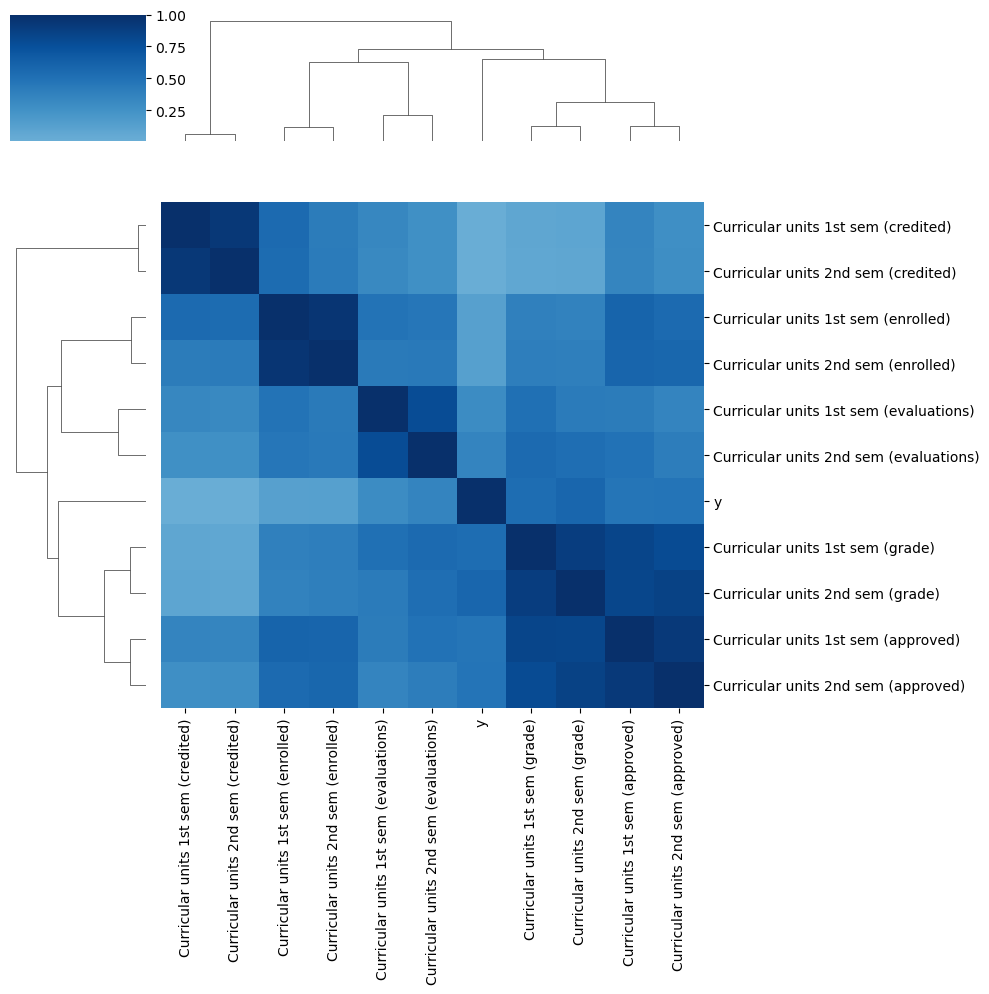

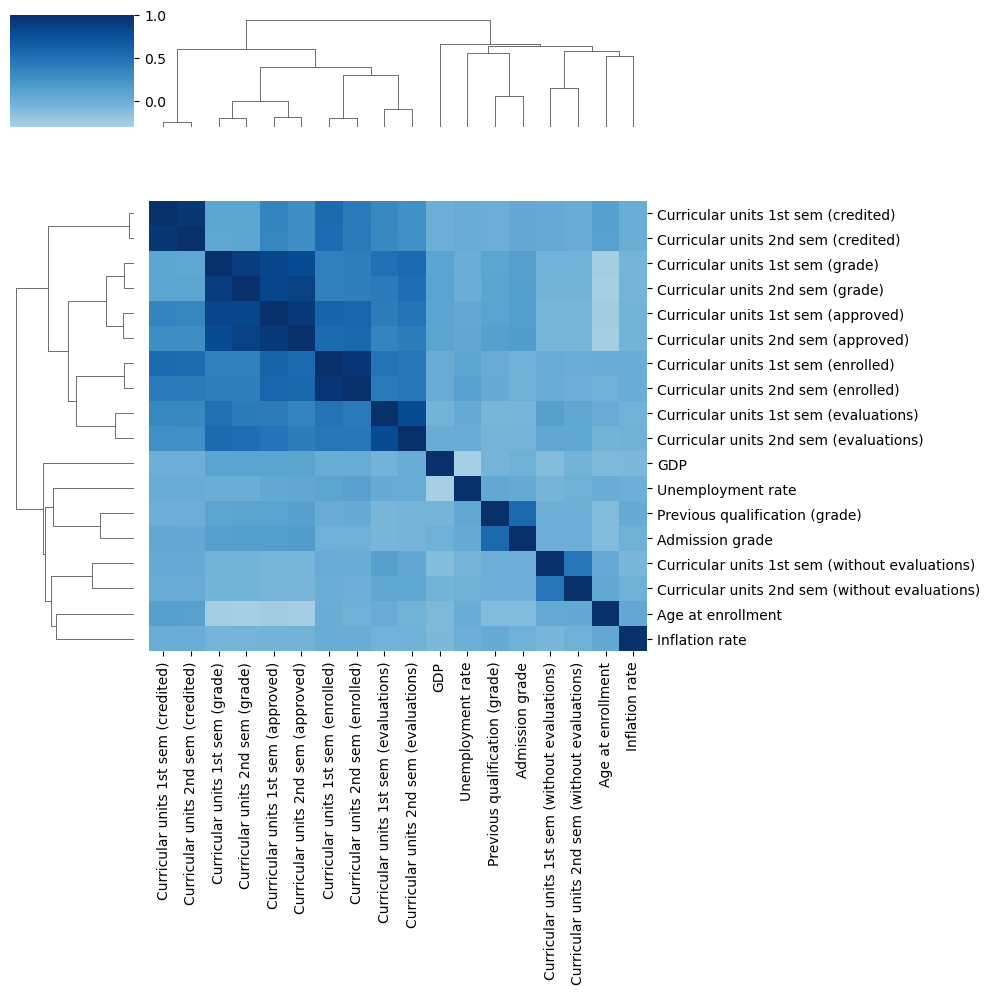

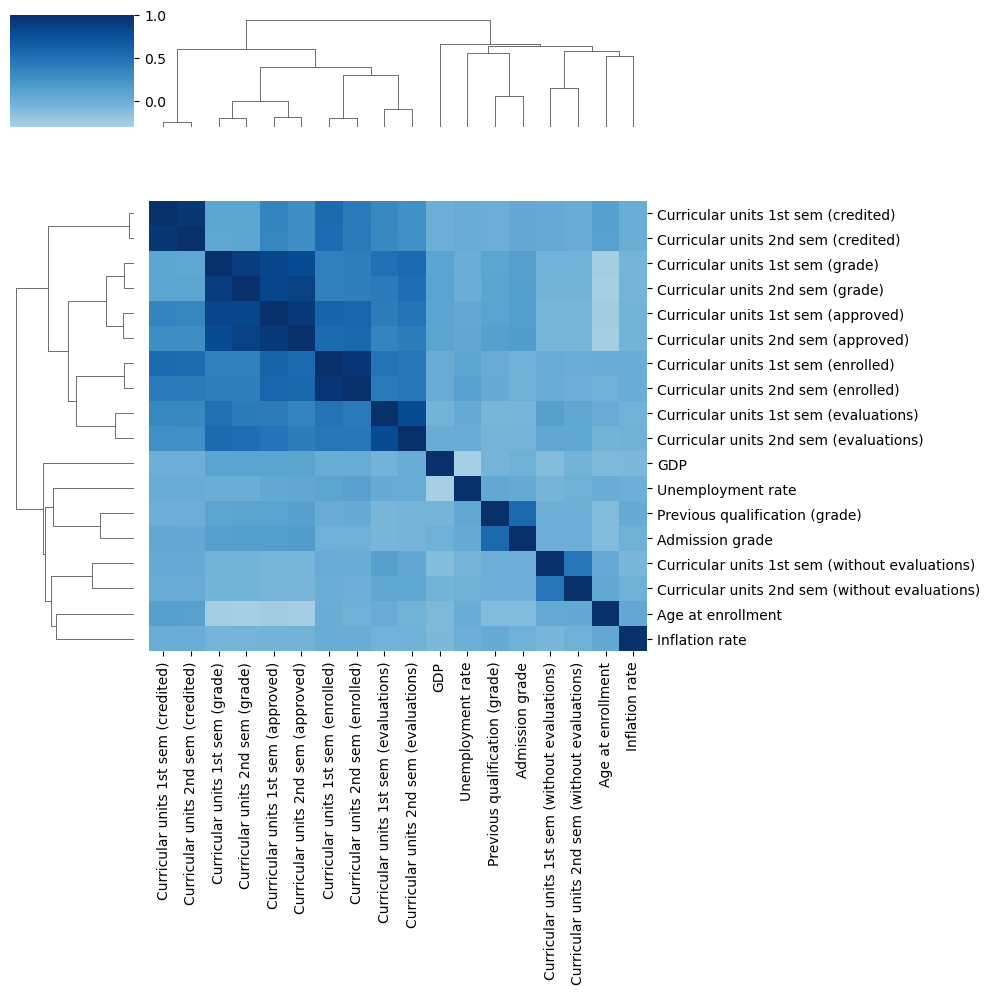

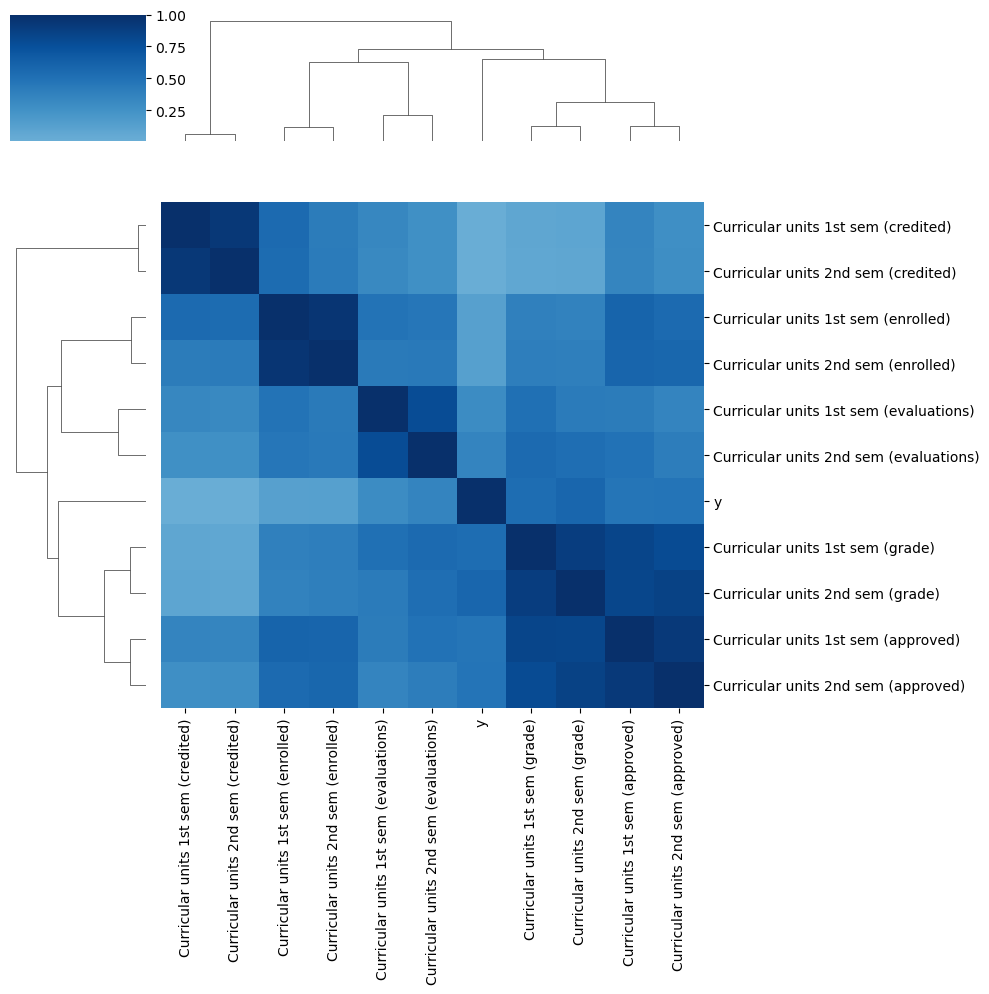

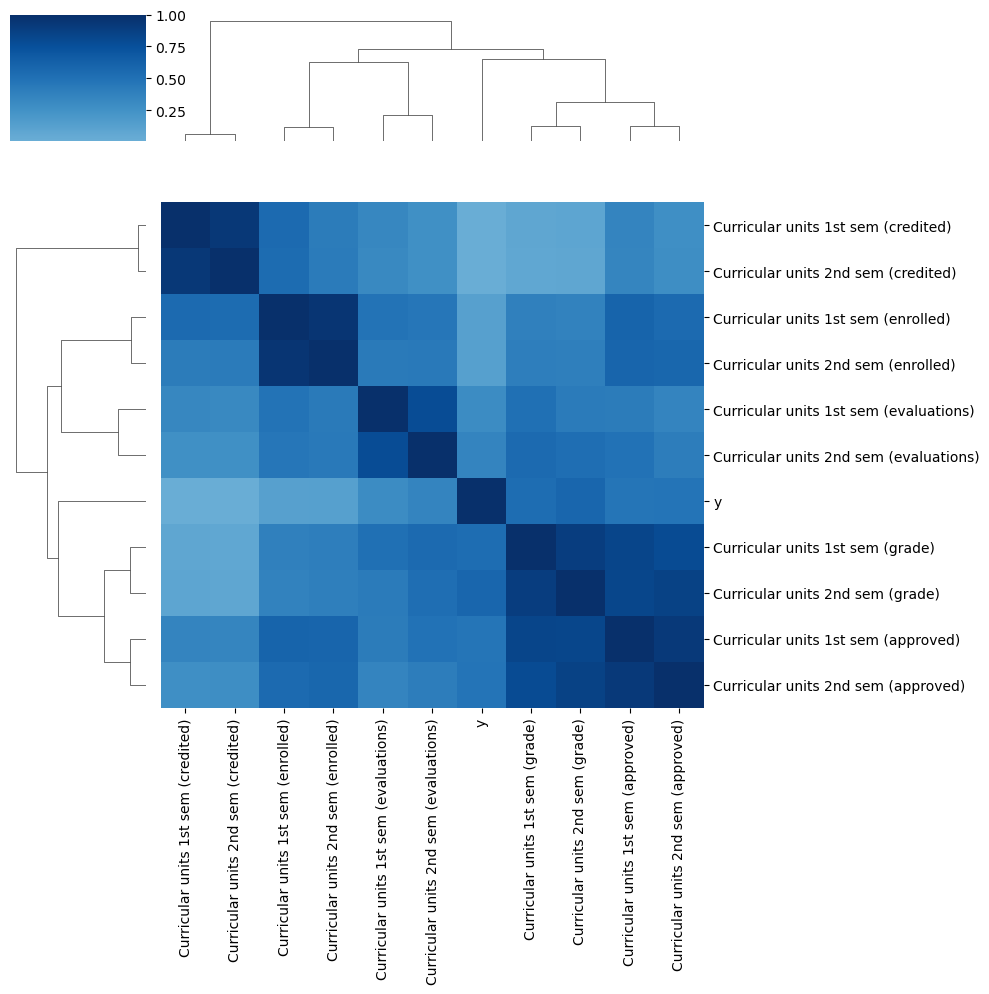

In [52]:
df['y'] = df['Target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2})

cols = ['Curricular units 1st sem (enrolled)',
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (credited)',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (grade)',
        'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (grade)',
        'y'
       ]

sns.clustermap(df[cols].corr(), cmap='Blues', center=0)
plt.tight_layout()
plt.show()

# Fazer

- Explicar correlação das variáveis com Target (focar apenas nessa correlação)
- Explorar variáveis desbalanceadas
- Basicamente explicar no notebook as conclusões do relatório
- Conduzir uma análise univariada focando apenas nas variáveis explicativas relevantes (com alta correlação com nossa variável alvo)
- Conduzir uma análise bivariada focando apenas nas relações mais fortes dessas variáveis
- Explorar o escopo com outras variáveis com correlações relevantes com a variável alvo
- Escrever a conclusão do notebook


<a name="corr"></a>
## | Correlação das Variáveis

Como nós possuímos ao todo **36 variáveis relevantes** (excluindo ID e Target) para avaliar a correlação, pode ser muito difícil visualizar tudo num único gráfico, portanto, vamos separar as variáveis em grupos e avaliar a correlação dentro dos grupos e entre os grupos.

### | Agrupando Variáveis por Tipo

A forma mais óbvia e fácil de agrupar as variáveis em grupos distintos é como fizemos acima para conduzir uma pré-análise dos dados; dividir as variáveis em **quantitativas** e **qualitativas**. Vamos usar essa divisão para visualizar a correlação das variáveis entre si e com a nossa variável **Target**

#### Variáveis Quantitativas

In [49]:
sns.clustermap(df.loc[:, quant].corr(), cmap='Blues', center=0)
plt.tight_layout()
plt.show()

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_16228\1377702463.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


O mais interessante do gráfico acima é a fortíssima correlação entre as variáveis que envolvem o desempenho acadêmico do aluno ao longo do ano, uma propriedade também destacada nos relatórios gerados das variáveis. Segue abaixo as cinco correlações mais significante desse grupo de variáveis.

In [53]:
df.loc[:, quant].corr().apply(abs)[df.loc[:, quant].corr() != 1.0].max().sort_values(ascending=False).iloc[:5]

Curricular units 2nd sem (enrolled)    0.956324
Curricular units 1st sem (enrolled)    0.956324
Curricular units 2nd sem (credited)    0.933899
Curricular units 1st sem (credited)    0.933899
Curricular units 1st sem (approved)    0.922698
dtype: float64

Agora vamos avaliar a correlação das variáveis **quantitativas** com a nossa variável **Target**.

In [1]:
corr_quant_target = pd.concat([df.loc[:, quant], df['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})], axis=1).corr().apply(abs)['Target'].sort_values(ascending=False)
corr_quant_target

NameError: name 'pd' is not defined

In [59]:
corr_quant_target.mean()

0.19878163712809765

Como é possível visualizar, as variáveis **quantitativas** tem uma correlação considerável com a variável **Target**. Principalmente as variáveis ligadas ao desempenho do aluno no ano acadêmico. Agora vamos visualizar as correlações do segundo grupo de variáveis.

#### Variáveis Qualitativas

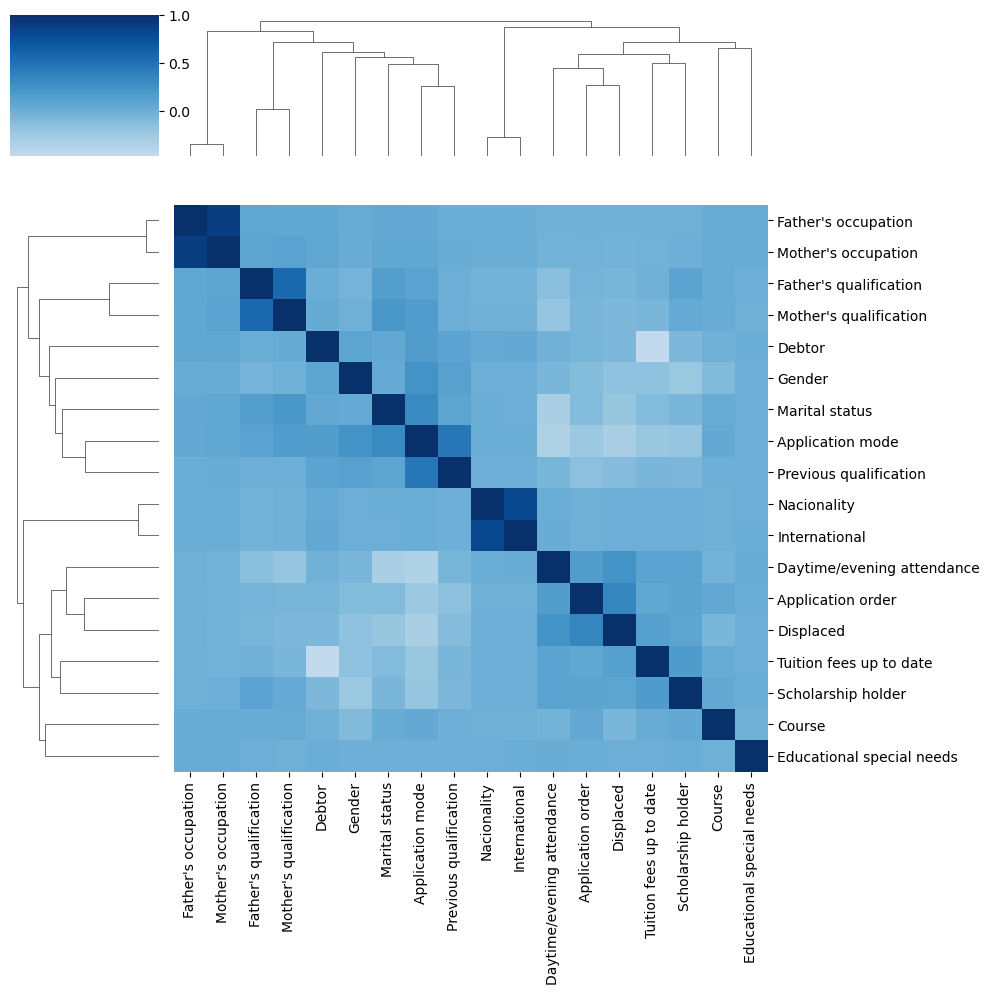

In [38]:
sns.clustermap(df.loc[:, qual].drop('Target', axis=1).corr(), cmap='Blues', center=0)
plt.tight_layout()
plt.show()

Como é possível observar, existe uma fortíssima correlação entre as variáveis **Father's Occupation** e **Mother's Occupation**, assim como outra interessante entre **Mother's Qualification** e **Father's Qualification**. Também temos uma fortísisma correlação entre **Nacionality** e **International**. Diferente do caso das variáveis envolvendo a mãe e o pai do estudante, nesse caso podemos considerar a correlação óbvio, visto que ambas as variáveis tem um alto cruzamente entre a classe 1 (Português) da **Nacionality** e a classe 0 (Aluno não internacional) da **International**. Existe outras correlações menores, porém eles não são tão prevalentes quanto essas duas citadas. Segue uma lista das cinco variáveis com as correlações mais fortes.

In [51]:
df.loc[:, qual].drop('Target', axis=1).corr().apply(abs)[df.loc[:, qual].drop('Target', axis=1).corr() != 1.0].max().sort_values(ascending=False).iloc[:5]

Father's occupation       0.895871
Mother's occupation       0.895871
Nacionality               0.816936
International             0.816936
Mother's qualification    0.567538
dtype: float64

Agora vamos avaliar a correlação das variáveis **qualitativas** com a nossa variável **Target**.

In [56]:
corr_qual_target = pd.concat([df.loc[:, qual].drop('Target', axis=1), df['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})], axis=1).corr().apply(abs)['Target'].sort_values(ascending=False)
corr_qual_target

Target                        1.000000
Scholarship holder            0.327609
Gender                        0.212916
Application mode              0.178328
Tuition fees up to date       0.137861
Application order             0.113853
Debtor                        0.102060
Displaced                     0.084538
Previous qualification        0.056640
Daytime/evening attendance    0.048385
Course                        0.048291
Marital status                0.047400
Mother's occupation           0.036394
Father's occupation           0.028467
Mother's qualification        0.020345
Nacionality                   0.003063
International                 0.002007
Educational special needs     0.001608
Father's qualification        0.000080
Name: Target, dtype: float64

In [57]:
corr_qual_target.mean()

0.12893921118948515

Como é possível observar, as variáveis **qualitativas** tem uma correlação menor com a variável **Target**, com apenas a variável **Scholarship holder** tendo uma correlação minimamente considerável. 